### Import Libraries

In [48]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Data Set

In [2]:
data=pd.read_csv('C:/Users/User/Desktop/NYC_Taxi/2017.csv')

In [3]:
data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,1,2017-01-01 09:00:01.0000000,2017-01-01 09:03:56.0000000,N,1,74,41,1,0.7,5.0,0.0,0.5,0.0,0.0,0.3,5.8,2,1.0
1,1,2017-01-01 18:57:55.0000000,2017-01-01 19:01:16.0000000,N,1,42,41,1,0.7,5.0,0.0,0.5,0.0,0.0,0.3,5.8,2,1.0
2,2,2017-01-02 06:55:47.0000000,2017-01-02 06:58:54.0000000,N,1,42,41,1,0.7,5.0,0.0,0.5,0.0,0.0,0.3,5.8,2,1.0
3,2,2017-01-02 14:34:17.0000000,2017-01-02 14:39:29.0000000,N,1,74,41,1,0.7,5.0,0.0,0.5,0.0,0.0,0.3,5.8,2,1.0
4,1,2017-01-03 06:12:30.0000000,2017-01-03 06:15:56.0000000,N,1,42,41,1,0.7,5.0,0.0,0.5,0.0,0.0,0.3,5.8,2,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11740667 entries, 0 to 11740666
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   lpep_pickup_datetime   object 
 2   lpep_dropoff_datetime  object 
 3   store_and_fwd_flag     object 
 4   RatecodeID             int64  
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   passenger_count        int64  
 8   trip_distance          float64
 9   fare_amount            float64
 10  extra                  float64
 11  mta_tax                float64
 12  tip_amount             float64
 13  tolls_amount           float64
 14  improvement_surcharge  float64
 15  total_amount           float64
 16  payment_type           int64  
 17  trip_type              float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1.6+ GB


In [5]:
# As time in object or must be in datetime 
# time is convert into datetime 

In [6]:
data["lpep_pickup_datetime"] = pd.to_datetime(data["lpep_pickup_datetime"])
data["lpep_dropoff_datetime"] = pd.to_datetime(data["lpep_dropoff_datetime"])


In [7]:
data['pickup_date'] = [d.date() for d in data['lpep_pickup_datetime']]
data['pickup_time'] = [d.time() for d in data['lpep_pickup_datetime']]

data['dropoff_date'] = [d.date() for d in data['lpep_dropoff_datetime']]
data['dropoff_time'] = [d.time() for d in data['lpep_dropoff_datetime']]

In [8]:
data.drop(["lpep_pickup_datetime"], axis = 1, inplace = True)
data.drop(["lpep_dropoff_datetime"], axis = 1, inplace = True)

In [9]:
data.head()

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,pickup_date,pickup_time,dropoff_date,dropoff_time
0,1,N,1,74,41,1,0.7,5.0,0.0,0.5,0.0,0.0,0.3,5.8,2,1.0,2017-01-01,09:00:01,2017-01-01,09:03:56
1,1,N,1,42,41,1,0.7,5.0,0.0,0.5,0.0,0.0,0.3,5.8,2,1.0,2017-01-01,18:57:55,2017-01-01,19:01:16
2,2,N,1,42,41,1,0.7,5.0,0.0,0.5,0.0,0.0,0.3,5.8,2,1.0,2017-01-02,06:55:47,2017-01-02,06:58:54
3,2,N,1,74,41,1,0.7,5.0,0.0,0.5,0.0,0.0,0.3,5.8,2,1.0,2017-01-02,14:34:17,2017-01-02,14:39:29
4,1,N,1,42,41,1,0.7,5.0,0.0,0.5,0.0,0.0,0.3,5.8,2,1.0,2017-01-03,06:12:30,2017-01-03,06:15:56


In [10]:
data["pickup_date"] = pd.to_datetime(data["pickup_date"])
data["dropoff_date"] = pd.to_datetime(data["dropoff_date"])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11740667 entries, 0 to 11740666
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   store_and_fwd_flag     object        
 2   RatecodeID             int64         
 3   PULocationID           int64         
 4   DOLocationID           int64         
 5   passenger_count        int64         
 6   trip_distance          float64       
 7   fare_amount            float64       
 8   extra                  float64       
 9   mta_tax                float64       
 10  tip_amount             float64       
 11  tolls_amount           float64       
 12  improvement_surcharge  float64       
 13  total_amount           float64       
 14  payment_type           int64         
 15  trip_type              float64       
 16  pickup_date            datetime64[ns]
 17  pickup_time            object        
 18  dropoff_date        

In [12]:
data.shape

(11740667, 20)

In [13]:
data.describe().round()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
count,11740667.0,11740667.0,11740667.0,11740667.0,11740667.0,11740667.0,11740667.0,11740667.0,11740667.0,11740667.0,11740667.0,11740667.0,11740667.0,11740667.0,11740640.0
mean,2.0,1.0,112.0,129.0,1.0,3.0,12.0,0.0,0.0,1.0,0.0,0.0,14.0,2.0,1.0
std,0.0,1.0,76.0,77.0,1.0,3.0,10.0,0.0,0.0,2.0,3.0,0.0,12.0,1.0,0.0
min,1.0,1.0,1.0,1.0,0.0,0.0,-480.0,-4.0,-0.0,-101.0,-80.0,-0.0,-480.0,1.0,1.0
25%,2.0,1.0,49.0,61.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,1.0
50%,2.0,1.0,82.0,129.0,1.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,11.0,1.0,1.0
75%,2.0,1.0,166.0,193.0,1.0,3.0,14.0,0.0,0.0,2.0,0.0,0.0,17.0,2.0,1.0
max,2.0,99.0,265.0,265.0,9.0,640.0,6004.0,30.0,1.0,450.0,8000.0,0.0,9000.0,5.0,2.0


In [14]:
data.describe().round().T

,count,mean,std,min,25%,50%,75%,max
VendorID,11740667.0,2.0,0.0,1.0,2.0,2.0,2.0,2.0
RatecodeID,11740667.0,1.0,1.0,1.0,1.0,1.0,1.0,99.0
PULocationID,11740667.0,112.0,76.0,1.0,49.0,82.0,166.0,265.0
DOLocationID,11740667.0,129.0,77.0,1.0,61.0,129.0,193.0,265.0
passenger_count,11740667.0,1.0,1.0,0.0,1.0,1.0,1.0,9.0
trip_distance,11740667.0,3.0,3.0,0.0,1.0,2.0,3.0,640.0
fare_amount,11740667.0,12.0,10.0,-480.0,6.0,9.0,14.0,6004.0
extra,11740667.0,0.0,0.0,-4.0,0.0,0.0,0.0,30.0
mta_tax,11740667.0,0.0,0.0,-0.0,0.0,0.0,0.0,1.0
tip_amount,11740667.0,1.0,2.0,-101.0,0.0,0.0,2.0,450.0


### Data Preprocessing


In [15]:
data.isnull().sum()

VendorID                  0
store_and_fwd_flag        0
RatecodeID                0
PULocationID              0
DOLocationID              0
passenger_count           0
trip_distance             0
fare_amount               0
extra                     0
mta_tax                   0
tip_amount                0
tolls_amount              0
improvement_surcharge     0
total_amount              0
payment_type              0
trip_type                27
pickup_date               0
pickup_time               0
dropoff_date              0
dropoff_time              0
dtype: int64

<AxesSubplot:>

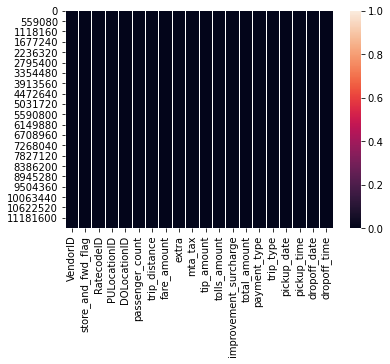

In [16]:
sns.heatmap(data.isnull())

In [17]:
data.dropna()

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,pickup_date,pickup_time,dropoff_date,dropoff_time
0,1,N,1,74,41,1,0.70,5.0,0.0,0.5,0.0,0.00,0.3,5.80,2,1.0,2017-01-01,09:00:01,2017-01-01,09:03:56
1,1,N,1,42,41,1,0.70,5.0,0.0,0.5,0.0,0.00,0.3,5.80,2,1.0,2017-01-01,18:57:55,2017-01-01,19:01:16
2,2,N,1,42,41,1,0.70,5.0,0.0,0.5,0.0,0.00,0.3,5.80,2,1.0,2017-01-02,06:55:47,2017-01-02,06:58:54
3,2,N,1,74,41,1,0.70,5.0,0.0,0.5,0.0,0.00,0.3,5.80,2,1.0,2017-01-02,14:34:17,2017-01-02,14:39:29
4,1,N,1,42,41,1,0.70,5.0,0.0,0.5,0.0,0.00,0.3,5.80,2,1.0,2017-01-03,06:12:30,2017-01-03,06:15:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11740662,2,N,1,244,220,1,4.15,16.0,0.0,0.5,0.0,2.64,0.3,19.44,2,1.0,2017-11-16,15:27:45,2017-11-16,15:42:43
11740663,1,N,1,244,200,1,5.60,17.0,0.0,0.5,0.0,2.64,0.3,20.44,2,1.0,2017-11-16,15:00:20,2017-11-16,15:11:22
11740664,1,N,1,244,220,1,3.60,13.0,0.0,0.5,0.0,2.64,0.3,16.44,2,1.0,2017-11-17,11:34:28,2017-11-17,11:45:45
11740665,2,N,1,244,220,1,4.09,15.0,0.0,0.5,0.0,2.64,0.3,18.44,1,1.0,2017-11-17,11:04:57,2017-11-17,11:18:08


In [18]:
# Before fit Missing Value

In [19]:
data[['trip_type']]

,trip_type
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
11740662,1.0
11740663,1.0
11740664,1.0
11740665,1.0


<AxesSubplot:xlabel='trip_type', ylabel='Density'>

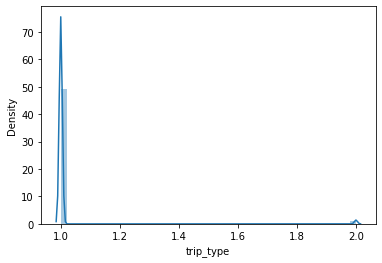

In [20]:
plt.subplot(1,1,1)
sns.distplot(data['trip_type'])


In [21]:
# Here we use mode we follow the trend of the data set from the graph we estimated that we used mode 

In [22]:
print('mode of trip_type =' ,data['trip_type'].mode()[0])


mode of trip_type = 1.0


In [23]:
data['trip_type']=data['trip_type'].fillna(data['trip_type'].mode()[0])

In [24]:
# After handle the missing value

In [25]:
data[['trip_type']]

,trip_type
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
11740662,1.0
11740663,1.0
11740664,1.0
11740665,1.0


In [26]:
data.isnull().sum()

VendorID                 0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
pickup_date              0
pickup_time              0
dropoff_date             0
dropoff_time             0
dtype: int64

<AxesSubplot:>

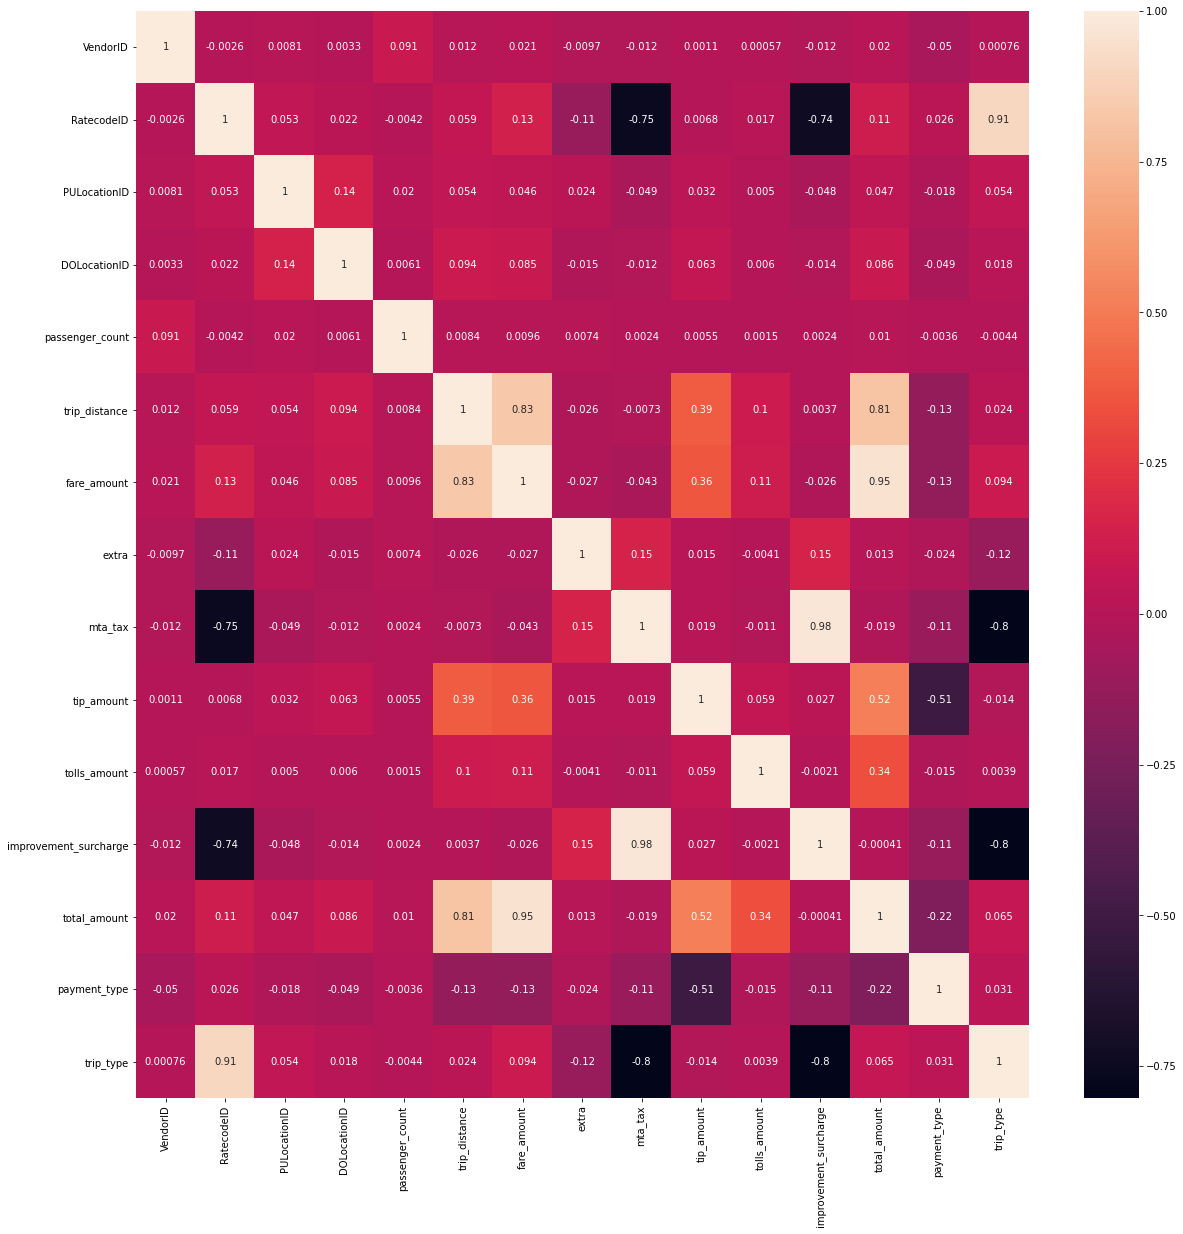

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr() , annot=True)

In [28]:
# Removing Outliers

<AxesSubplot:xlabel='payment_type'>

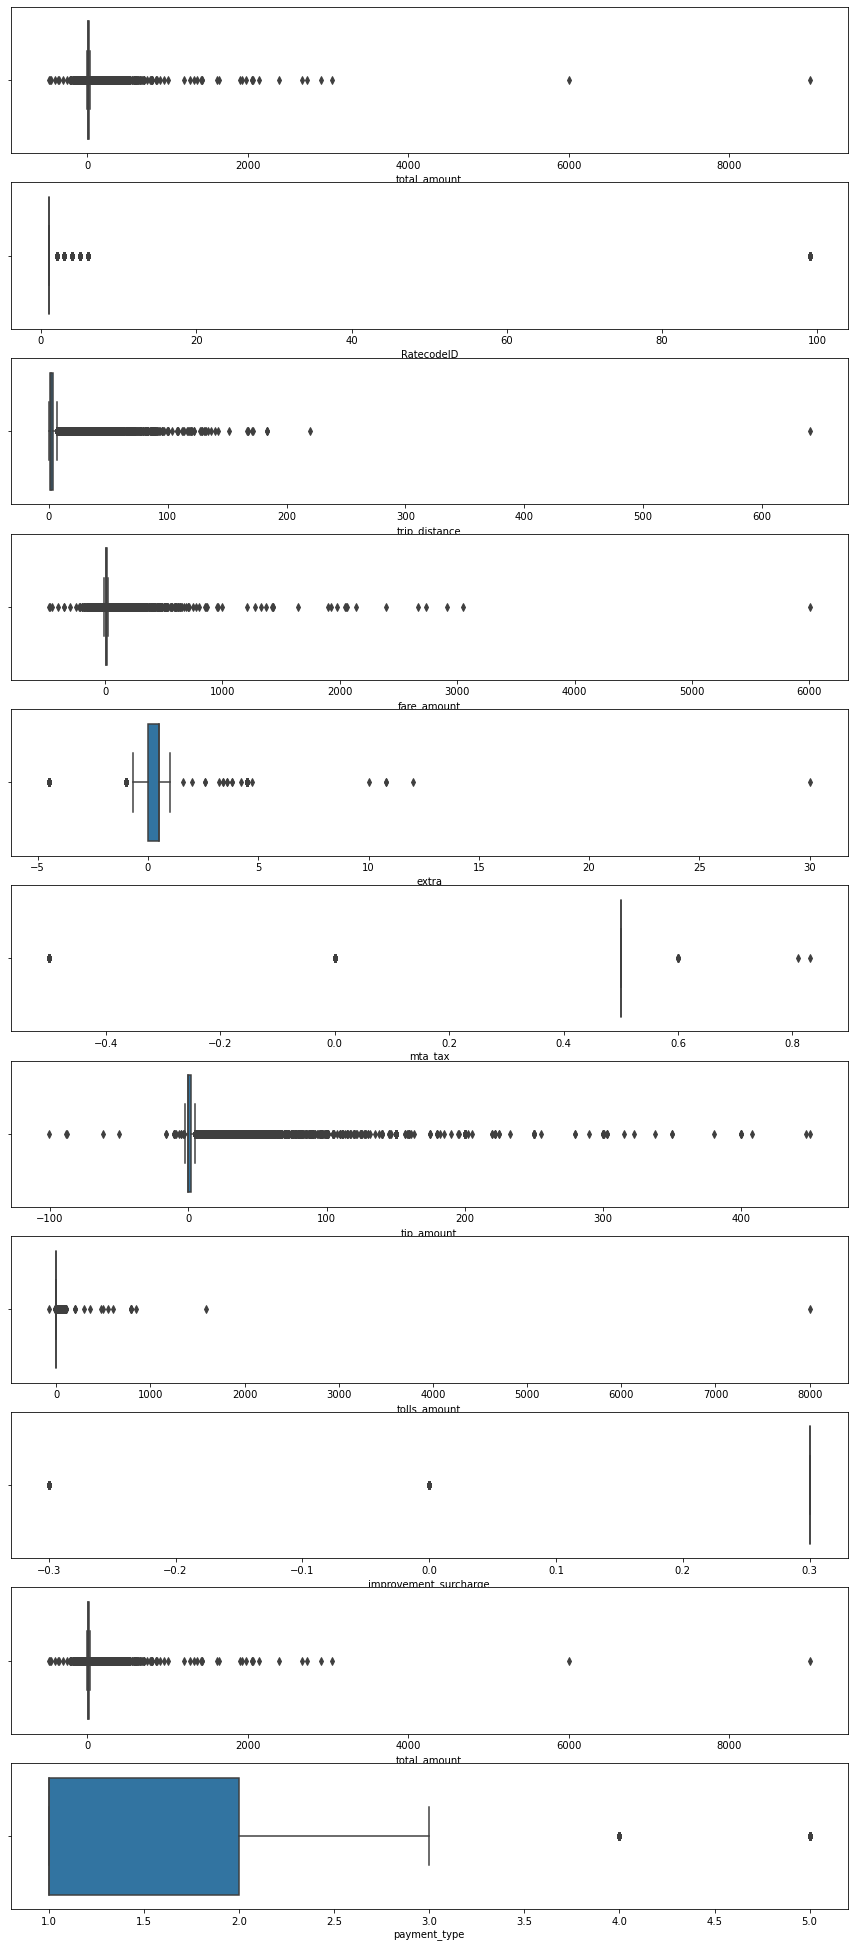

In [29]:
plt.figure(figsize=(15,35))
plt.subplot(11,1,1)
sns.boxplot(data['total_amount'])
plt.subplot(11,1,2)
sns.boxplot(data['RatecodeID'])
plt.subplot(11,1,3)
sns.boxplot(data['trip_distance'])
plt.subplot(11,1,4)
sns.boxplot(data['fare_amount'])
plt.subplot(11,1,5)
sns.boxplot(data['extra'])
plt.subplot(11,1,6)
sns.boxplot(data['mta_tax'])
plt.subplot(11,1,7)
sns.boxplot(data['tip_amount'])
plt.subplot(11,1,8)
sns.boxplot(data['tolls_amount'])
plt.subplot(11,1,9)
sns.boxplot(data['improvement_surcharge'])
plt.subplot(11,1,10)
sns.boxplot(data['total_amount'])
plt.subplot(11,1,11)
sns.boxplot(data['payment_type'])

In [30]:
data= data[(data['total_amount'] < 16.8) & (data['total_amount'] > 2) ]
data= data[(data['RatecodeID'] < 1.8) & (data['total_amount'] > 0)]
data= data[(data['trip_distance'] < 2.5)  & (data['trip_distance'] > -0.5)]
data= data[(data['fare_amount'] < 13) & (data['fare_amount'] > 0.5) ]
data= data[(data['extra'] < 1.5) & (data['extra'] > 0) ]
data= data[(data['mta_tax'] < 0.6) & (data['mta_tax'] > 0.4) ]
data= data[(data['tip_amount'] < 3.5) & (data['tip_amount'] > -1) ]
data= data[(data['tolls_amount'] < 0.01) & (data['tolls_amount'] > -0.5) ]
data= data[(data['improvement_surcharge'] < 0.35) & (data['improvement_surcharge'] > 0.2) ]
data= data[(data['payment_type'] < 1.6) & (data['payment_type'] > 0.0) ]

<AxesSubplot:xlabel='payment_type'>

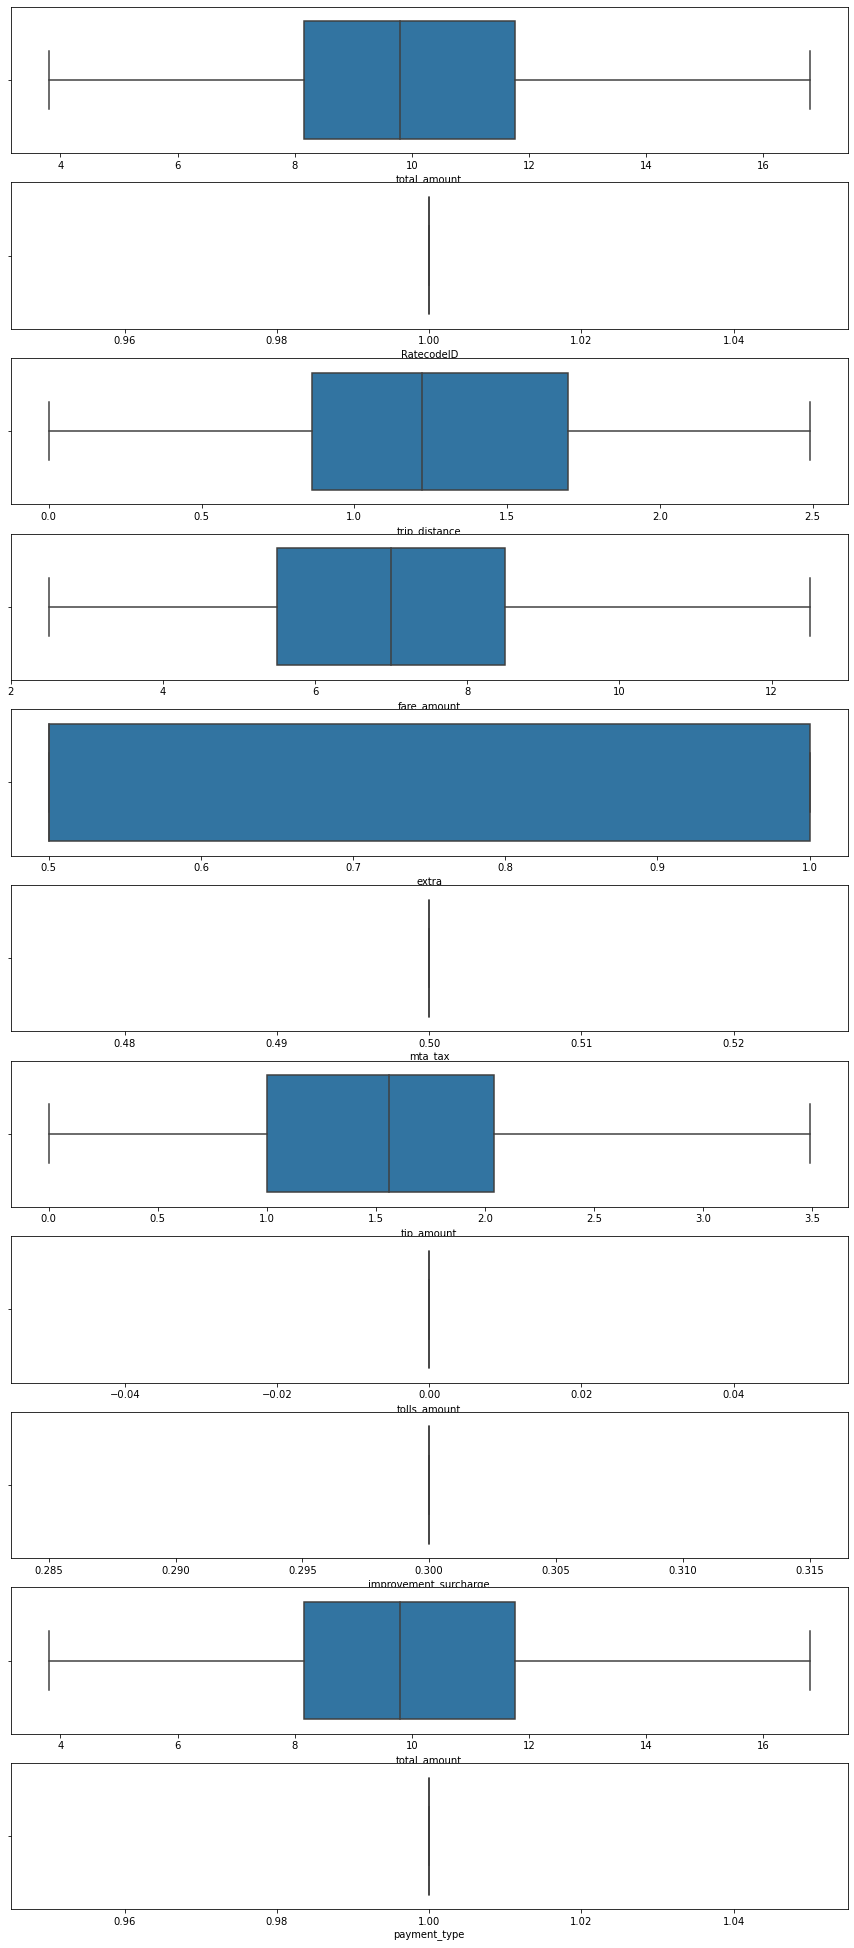

In [31]:
plt.figure(figsize=(15,35))
plt.subplot(11,1,1)
sns.boxplot(data['total_amount'])
plt.subplot(11,1,2)
sns.boxplot(data['RatecodeID'])
plt.subplot(11,1,3)
sns.boxplot(data['trip_distance'])
plt.subplot(11,1,4)
sns.boxplot(data['fare_amount'])
plt.subplot(11,1,5)
sns.boxplot(data['extra'])
plt.subplot(11,1,6)
sns.boxplot(data['mta_tax'])
plt.subplot(11,1,7)
sns.boxplot(data['tip_amount'])
plt.subplot(11,1,8)
sns.boxplot(data['tolls_amount'])
plt.subplot(11,1,9)
sns.boxplot(data['improvement_surcharge'])
plt.subplot(11,1,10)
sns.boxplot(data['total_amount'])
plt.subplot(11,1,11)
sns.boxplot(data['payment_type'])

In [ ]:
# After removing ouliers
sns.heatmap(data.isnull())

<AxesSubplot:>

In [34]:
data.head()

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,pickup_date,pickup_time,dropoff_date,dropoff_time
424351,1,Y,1,41,41,1,0.6,4.5,1.0,0.5,0.0,0.0,0.3,6.3,1,1.0,2017-01-06,16:32:36,2017-01-06,16:36:20
424355,1,Y,1,75,42,1,2.1,10.0,1.0,0.5,0.0,0.0,0.3,11.8,1,1.0,2017-01-12,16:10:45,2017-01-12,16:22:51
424356,1,Y,1,74,41,1,0.7,6.0,1.0,0.5,0.0,0.0,0.3,7.8,1,1.0,2017-01-13,16:08:09,2017-01-13,16:14:23
424358,1,Y,1,97,97,1,1.1,5.5,1.0,0.5,0.0,0.0,0.3,7.3,1,1.0,2017-01-19,02:55:53,2017-01-19,02:59:33
424359,1,Y,1,41,41,1,0.3,4.0,1.0,0.5,0.0,0.0,0.3,5.8,1,1.0,2017-01-19,16:20:07,2017-01-19,16:23:38


<AxesSubplot:xlabel='trip_distance', ylabel='total_amount'>

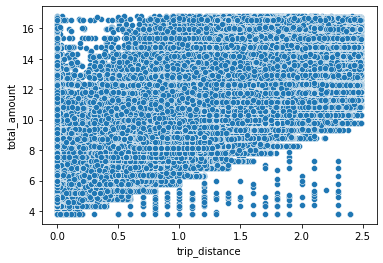

In [35]:
# passenger count with the trip distance
sns.scatterplot(x=data['trip_distance'], y=data['total_amount'] )

<AxesSubplot:xlabel='total_amount', ylabel='passenger_count'>

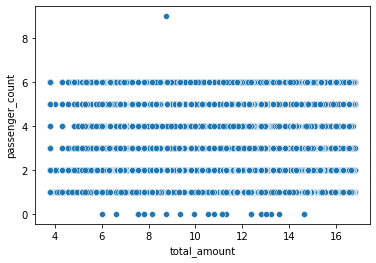

In [36]:
# mean of passenger coount 
sns.scatterplot(y=data['passenger_count'],x=data['total_amount'])

<AxesSubplot:xlabel='payment_type', ylabel='total_amount'>

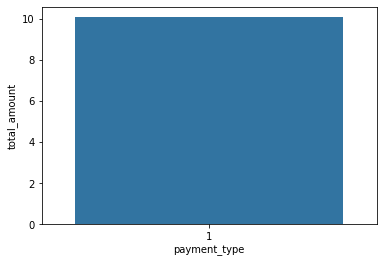

In [37]:
# average total amount spend from the passenger 
sns.barplot(x=data['payment_type'],  y=data['total_amount'])

<AxesSubplot:xlabel='mta_tax', ylabel='total_amount'>

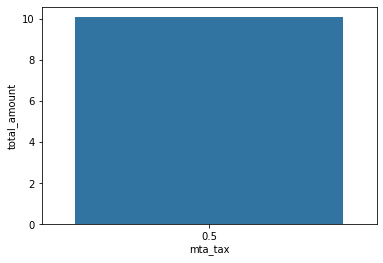

In [38]:
# total amount with mta_tax
sns.barplot(y=data['total_amount'] , x=data['mta_tax'])

In [39]:
## Split data  set

In [40]:
x =data[['trip_type' ,'payment_type', 'trip_distance' , 'passenger_count','PULocationID','DOLocationID']]
y=data[['fare_amount']]

In [41]:
x.head()

,trip_type,payment_type,trip_distance,passenger_count,PULocationID,DOLocationID
424351,1.0,1,0.6,1,41,41
424355,1.0,1,2.1,1,75,42
424356,1.0,1,0.7,1,74,41
424358,1.0,1,1.1,1,97,97
424359,1.0,1,0.3,1,41,41


In [42]:
y.head()

,fare_amount
424351,4.5
424355,10.0
424356,6.0
424358,5.5
424359,4.0


### Test train split data set / Model Selction


In [43]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train, y_test =train_test_split(x,y,test_size=0.2 ,random_state=0)

In [44]:
print('size of x_train' , x_train.shape)
print('size of x_test' , x_test.shape)
print('size of y_train' , x_train.shape)
print('size of y_test' , x_test.shape)

size of x_train (1432089, 6)
size of x_test (358023, 6)
size of y_train (1432089, 6)
size of y_test (358023, 6)


### Model selection

In [45]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(x_train ,y_train)

### Price prediction


In [46]:
#'trip_type' ,'payment_type', 'trip_distance' ,
#'passenger_count','PULocationID','DOLocationID'
model.predict([[1,2 ,1.5,1,45,74]])

array([[7.79960645]])

In [54]:
mlr = pd.DataFrame({'Actual_value' : y_test.squeeze() , "Model prediction" : model.predict(x_test).squeeze() })
mlr

,Actual_value,Model prediction
455489,5.0,5.315226
10447131,10.5,9.230706
2802524,10.5,10.194548
2944614,8.5,9.227432
2801258,11.0,5.691773
...,...,...
4831968,5.0,5.276309
1894609,9.0,9.599412
2833916,5.0,5.160095
7213137,5.0,5.694192


In [55]:
## Future prediction

In [56]:
model.predict([[1,2 ,1.5,1,45,67]])

array([[7.80175046]])

In [57]:
# model Evaloation

In [58]:
model.score(x_test,y_test)

0.7965989027864051

In [59]:
model.score(x_train,y_train)

0.7957720225819684

In [60]:
print('Score for test model =' , model.score(x_test , y_test)  )
print('Score for train model =' , model.score(x_train , y_train) )

Score for test model = 0.7965989027864051
Score for train model = 0.7957720225819684


## Error

In [61]:
from sklearn import metrics

In [62]:
print('mean absolute error', metrics.mean_absolute_error(y_test , model.predict(x_test)) )

mean absolute error 0.6704360364829945


In [63]:
print('mean square error' ,metrics.mean_squared_error(y_test,model.predict(x_test)))

mean square error 0.852774202996984


In [64]:
print('root mean square error' ,np.sqrt(metrics.mean_squared_error(y_test,model.predict(x_test))))

root mean square error 0.9234577429406199


# Graph

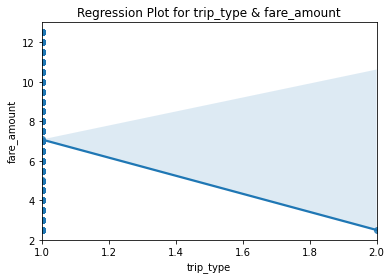

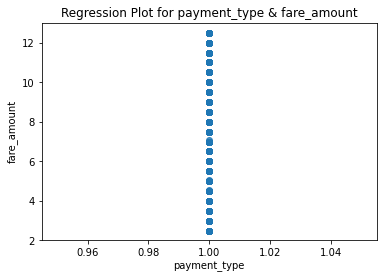

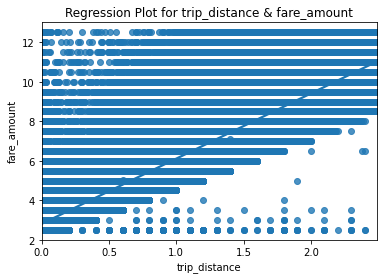

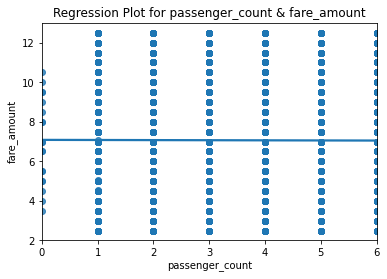

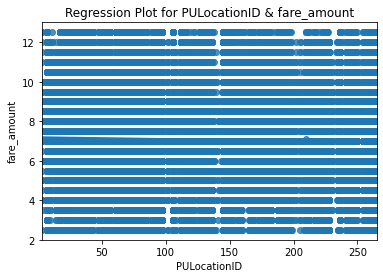

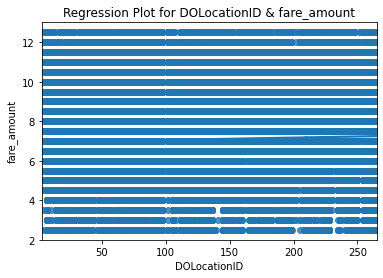

In [65]:
variables =['trip_type' ,'payment_type', 'trip_distance' , 'passenger_count','PULocationID','DOLocationID']
y=data[['fare_amount']]

for var in variables:
    sns.regplot(x_train[var],y_train['fare_amount']).set(title=f'Regression Plot for {var} & fare_amount')
    plt.show()
    

# Conclusion

The Multiple Linear Regression model performs well as 68.75% of the data fit the regression model. 
